In [29]:
# Importing required libraries
import pandas as pd 
from pymongo import MongoClient 

#connecting to local MONGO DB
client = MongoClient('mongodb://localhost:27017/')
db = client['life_expectancy_db']
collection = db['life_expectancy']

# collecting all data from mongo DB and coverting into a list
data = collection.find() 
data_list = list(data)
# Creating A DATAFRAME 
df = pd.DataFrame(data_list) 


    

In [30]:
df.head()

,_id,Country,Year,Life Expectancy
0,67fcc97e0331f8156c49949b,Afghanistan,1950,28.1563
1,67fcc97e0331f8156c49949c,Afghanistan,1951,28.5836
2,67fcc97e0331f8156c49949d,Afghanistan,1952,29.0138
3,67fcc97e0331f8156c49949e,Afghanistan,1953,29.4521
4,67fcc97e0331f8156c49949f,Afghanistan,1954,29.6975


In [31]:
#REMOVING ID COLUMN

In [32]:
df = df.drop('_id', axis=1) 

In [33]:
df.head()

,Country,Year,Life Expectancy
0,Afghanistan,1950,28.1563
1,Afghanistan,1951,28.5836
2,Afghanistan,1952,29.0138
3,Afghanistan,1953,29.4521
4,Afghanistan,1954,29.6975


In [34]:
df.info

<bound method DataFrame.info of            Country  Year  Life Expectancy
0      Afghanistan  1950          28.1563
1      Afghanistan  1951          28.5836
2      Afghanistan  1952          29.0138
3      Afghanistan  1953          29.4521
4      Afghanistan  1954          29.6975
...            ...   ...              ...
21560        World  1770          28.5000
21561        World  1800          28.5000
21562        World  1820          29.0000
21563        World  1850          29.3000
21564        World  1870          29.7000

[21565 rows x 3 columns]>

In [35]:
"""Rounding life expectancy up to 2 place of decimal"""

'Rounding life expectancy up to 2 place of decimal'

In [36]:
df['Life Expectancy'] = df['Life Expectancy'].round(2)

In [37]:
df.tail()

,Country,Year,Life Expectancy
21560,World,1770,28.5
21561,World,1800,28.5
21562,World,1820,29.0
21563,World,1850,29.3
21564,World,1870,29.7


In [38]:
df.describe()

,Year,Life Expectancy
count,21565.000000,21565.000000
mean,1976.992812,61.942238
std,38.461606,12.925910
min,1543.000000,10.990000
25%,1962.000000,52.700000
50%,1982.000000,64.480000
75%,2003.000000,71.980000
max,2023.000000,86.370000


In [39]:
mean_df = df.groupby('Country')['Life Expectancy'].mean()

In [40]:
mean_df = mean_df.round(2)
# making country a column
mean_df = mean_df.reset_index()

In [41]:
mean_df.info

<bound method DataFrame.info of             Country  Life Expectancy
0       Afghanistan            45.67
1            Africa            49.74
2           Albania            68.77
3           Algeria            58.26
4    American Samoa            68.94
..              ...              ...
260  Western Sahara            52.31
261           World            58.93
262           Yemen            52.07
263          Zambia            52.90
264        Zimbabwe            54.78

[265 rows x 2 columns]>

In [42]:
# finding out top and bottom 5 country accoung to mean life expectancy

top = mean_df.sort_values('Life Expectancy', ascending=False).head(5)

In [43]:
bottom= mean_df.sort_values('Life Expectancy').head(5)

In [44]:
top.head(5)

,Country,Life Expectancy
156,Monaco,78.05
207,San Marino,78.00
6,Andorra,77.99
92,Guernsey,77.00
133,Liechtenstein,76.29


In [45]:
bottom.head(5)

,Country,Life Expectancy
245,USSR,32.70
224,South Sudan,37.84
214,Sierra Leone,43.19
145,Mali,43.76
171,Niger,44.19


In [46]:
# importing library
import plotly.graph_objects as go

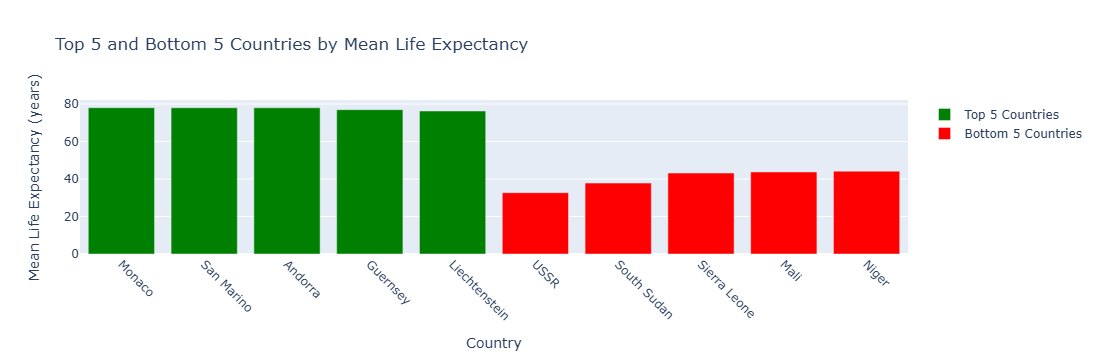

Closed MongoDB


In [57]:
# making interactive plots
fig = go.Figure()

#TOP 20 BAR GRAPH
fig.add_trace(go.Bar(
    x=top['Country'],
    y=top['Life Expectancy'],
    name='Top 5 Countries',
    marker_color='green'
))

#BOTTOM 20 BAR GRAPH
fig.add_trace(go.Bar(
    x=bottom['Country'],
    y=bottom['Life Expectancy'],
    name='Bottom 5 Countries',
    marker_color='red'
))

#
fig.update_layout(
    title='Top 5 and Bottom 5 Countries by Mean Life Expectancy',
    xaxis_title='Country',  # x label
    yaxis_title='Mean Life Expectancy (years)',
    xaxis_tickangle=45,
    showlegend=True 
)

#SHOW FIGURE
fig.show() 




# Close MongoDB
client.close()
print("Closed MongoDB")